In [1]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import string
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

from sklearn import preprocessing, utils, tree, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn. metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [2]:
file = "diabetes.csv"
dataset = pd.read_csv(file)

scaler = preprocessing.MinMaxScaler()
names = dataset.columns
d = scaler.fit_transform(dataset)
dataset = pd.DataFrame(d, columns=names)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [3]:
############## TASK 1 Зниження розмірності і візуалізація даних ###################

In [4]:
X = dataset.drop('Outcome', axis=1);
y = dataset['Outcome'];

principal_components = PCA(n_components=2)
X_pca = principal_components.fit_transform(X)
X_pca = pd.DataFrame({'principal_component_1': X_pca[:,0], 'principal_component_2': X_pca[:,1]})
pca_dataset = pd.concat([X_pca, y], axis = 1)
pca_dataset.describe()

,principal_component_1,principal_component_2,Outcome
count,7.680000e+02,7.680000e+02,768.000000
mean,2.255141e-17,2.746646e-17,0.348958
std,2.541211e-01,2.094347e-01,0.476951
min,-4.294259e-01,-6.038625e-01,0.000000
25%,-2.112202e-01,-1.430258e-01,0.000000
50%,-6.358515e-02,-1.209879e-02,0.000000
75%,1.921084e-01,1.291985e-01,1.000000
max,7.505469e-01,8.366637e-01,1.000000


<AxesSubplot: xlabel='principal_component_1', ylabel='principal_component_2'>

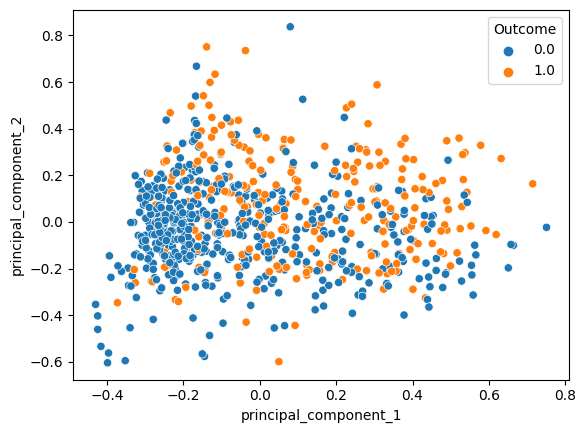

In [5]:
sns.scatterplot(data=pca_dataset, x='principal_component_1', y='principal_component_2', hue='Outcome') 

In [6]:
tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X)
X_tsne=pd.DataFrame({'tsne_1': X_tsne[:,0], 'tsne_2': X_tsne[:,1]})
tsne_dataset = pd.concat([X_tsne, y], axis = 1)
tsne_dataset.describe()

C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


,tsne_1,tsne_2,Outcome
count,768.000000,768.000000,768.000000
mean,-0.181243,-0.285599,0.348958
std,15.744537,15.744963,0.476951
min,-26.889818,-33.760735,0.000000
25%,-14.624358,-14.207742,0.000000
50%,-1.188743,1.737697,0.000000
75%,14.757755,12.853517,1.000000
max,32.815136,29.390892,1.000000


<AxesSubplot: xlabel='tsne_1', ylabel='tsne_2'>

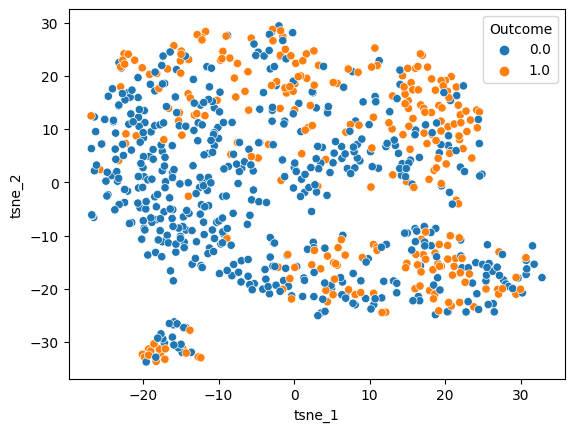

In [7]:
sns.scatterplot(data=tsne_dataset, x='tsne_1', y='tsne_2', hue='Outcome')

In [8]:
############## TASK 2 Кластерний аналіз ###################

In [9]:
############## 2.1 k-means algorithm #################

In [10]:
n_colors = [64, 32, 16, 8]
img = Image.open('image.jpg')
# Convert to floats instead of the default 8 bits integer coding.
img = np.array(img, dtype=np.float64) / 255

#transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans_arr = []
labels_arr = []
for i in range(len(n_colors)):
    kmeans_arr.append(KMeans(n_clusters=n_colors[i], random_state=0).fit(image_array_sample))
    labels_arr.append(kmeans_arr[i].predict(image_array))

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1);

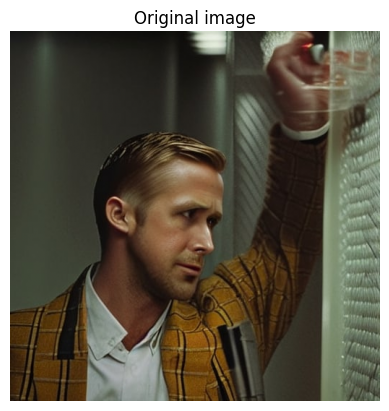

In [11]:
plt.figure(i)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(img)

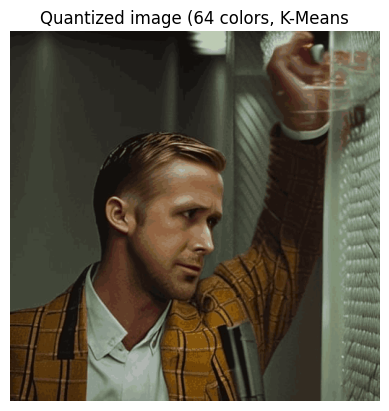

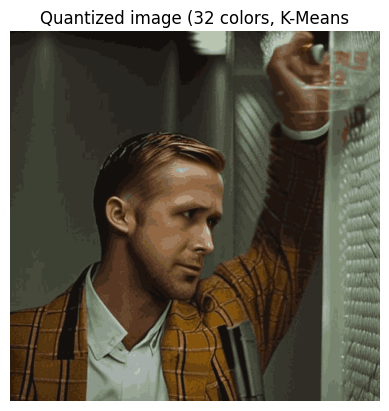

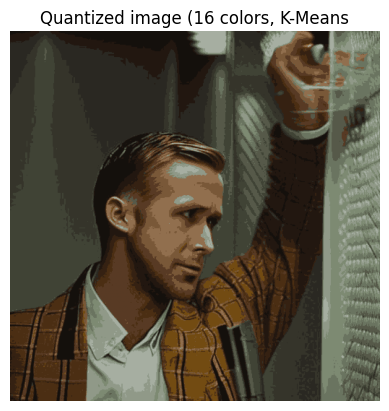

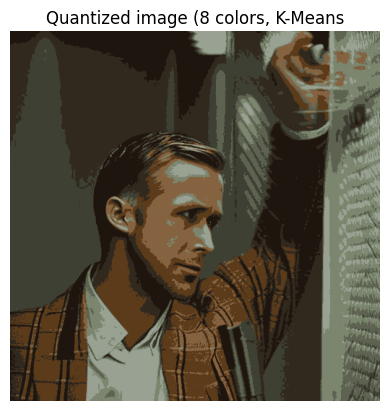

In [12]:
for i in range(len(n_colors)):
    plt.figure(i+1)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors[i]} colors, K-Means")
    plt.imshow(recreate_image(kmeans_arr[i].cluster_centers_, labels_arr[i], w, h))

In [13]:
############## TASK 3 Обробка та класифікація текстових даних ###################

In [14]:
dataset = pd.read_csv('spam.csv', encoding='latin-1')
#https://www.kaggle.com/code/dejavu23/sms-spam-or-ham-beginner/data
dataset = dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
dataset = dataset.rename(columns={"v1":"label", "v2":"text"})
dataset.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
def cleaning(value):
    punctuation_cleaning = []
    stopwords_cleaning_string = ''
    
    for i in value:
        if i not in string.punctuation:
            punctuation_cleaning.append(i)
    punctuation_cleaning = "".join(punctuation_cleaning).split()
    
    for j in punctuation_cleaning:
        if j.lower() not in stopwords.words("english"):
            stopwords_cleaning_string += j.lower() + ' '
    
    return stopwords_cleaning_string

dataset['text'] = dataset['text'].apply(cleaning)

In [16]:
dataset.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [17]:
##################### VISUALISATION ################

In [18]:
def wordcloud_visualisation(label):
    text = ' '.join(dataset[dataset['label'] == label]['text'])
    stopwords = set(wordcloud.STOPWORDS)
    wc_figure = wordcloud.WordCloud(stopwords=STOPWORDS, background_color='white', width=700, height=500).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(wc_figure)  
    plt.axis('off')
    plt.show()

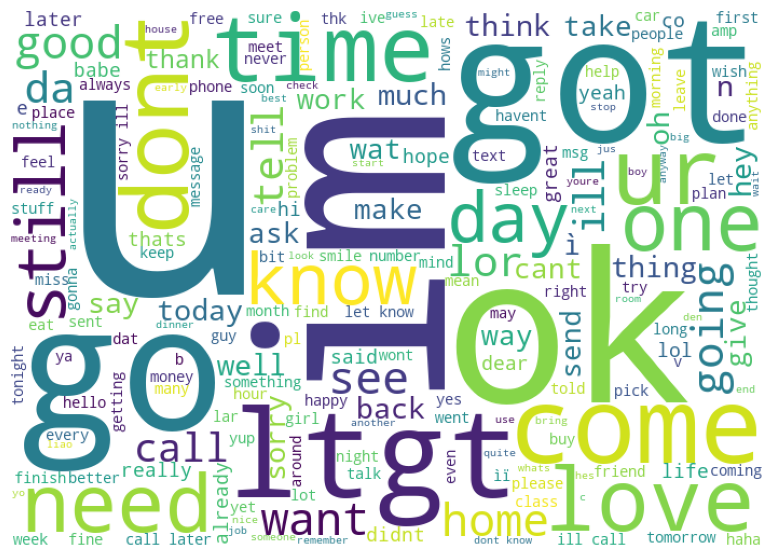

In [19]:
wordcloud_visualisation('ham')

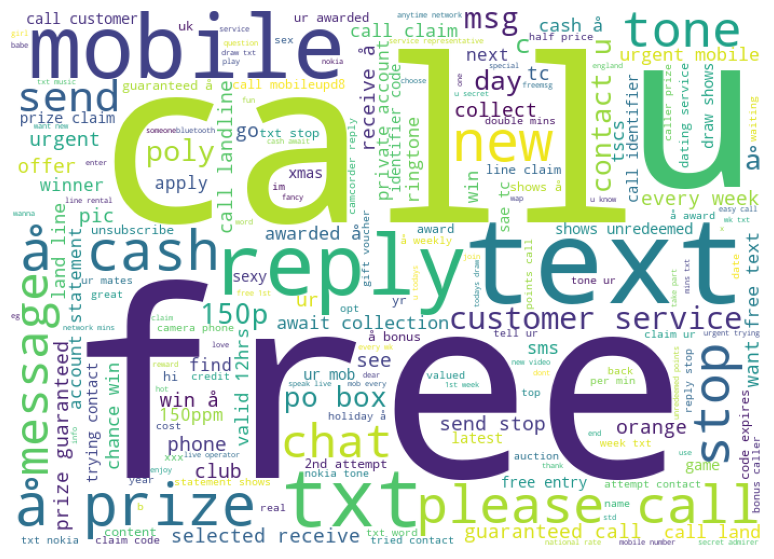

In [20]:
wordcloud_visualisation('spam')

In [21]:
#################### VECTORIZING #########################

In [22]:
X = dataset['text']
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
tfidfv = TfidfVectorizer()
X_train_vectorised = tfidfv.fit_transform(X_train)
X_test_vectorised = tfidfv.transform(X_test)

In [23]:
################### CLASSIFICATION ######################

In [24]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_vectorised, y_train)
    y_pred = knn.predict(X_test_vectorised)
    accuracy.append(accuracy_score(y_test, y_pred))
    
print("Best accuracy:",max(accuracy),"when K =",accuracy.index(max(accuracy))+1)

Best accuracy: 0.9623318385650225 when K = 1


In [25]:
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1)
knn.fit(X_train_vectorised, y_train)
y_pred = knn.predict(X_test_vectorised)

print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       982
        spam       1.00      0.68      0.81       133

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.90      1115
weighted avg       0.96      0.96      0.96      1115



[[982   0]
 [ 42  91]]
